In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import SVG
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape
from keras.optimizers import SGD, Adam
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Using TensorFlow backend.


In [4]:
import numpy as np
np.random.seed(0)
THREADS_NUM = 20
tf.ConfigProto(intra_op_parallelism_threads = THREADS_NUM)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('原数据结构：')
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

nb_classes = 10

x_train_1 = X_train.reshape(60000, 784)
y_train_1 = np_utils.to_categorical(Y_train, nb_classes)
print('变换后的数据结构：')
print(x_train_1.shape, y_train_1.shape)

x_test_1 = X_test.reshape(10000, 784)
y_test_1 = np_utils.to_categorical(Y_test, nb_classes)
print(x_test_1.shape, y_test_1.shape)

原数据结构：
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
变换后的数据结构：
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [5]:
model = Sequential()
model.add(Dense(nb_classes, input_shape=(784,)))
model.add(Activation('softmax'))

sgd = SGD(lr=0.005)

model.compile(loss='binary_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

AttributeError: module 'pydot' has no attribute 'find_graphviz'

In [6]:
from keras.callbacks import Callback, TensorBoard

class lossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
    
class BatchTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=False):
        super(BatchTensorBoard, self).__init__()
        self.log_dir = log_dir
        self.histogram_freq = histogram_freq
        self.merged = None
        self.write_graph = write_graph
        self.write_images = write_images
        self.batch = 0
        self.batch_queue = set()
        
    def on_epoch_end(self, epoch, logs=None):
        pass
    
    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.batch = self.batch + 1
        
        for name, value in logs.items():
            if name in ['batch', 'size']:
                continue
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = float(value)
            summary_value.tag = "batch_" + name
            if (name, self.batch) in self.batch_queue:
                continue
            self.writer.add_summary(summary, self.batch)
            self.batch_queue.add((name, self.batch))
        self.writer.flush()

In [11]:
tensorboard = TensorBoard(log_dir='D:/epoch')
my_tensorboard = BatchTensorBoard(log_dir='D:/batch')

model.fit(x_train_1, y_train_1,
         epochs=20,
         verbose=0,
         batch_size=100,
         callbacks=[tensorboard, my_tensorboard])

In [12]:
print(model.metrics_names)
model.evaluate(x_test_1, y_test_1,
              verbose=1,
              batch_size=100)

['loss', 'acc']
 9300/10000 [==========================>...] - ETA: 0s

[0.5322725410759449, 0.96572008967399592]

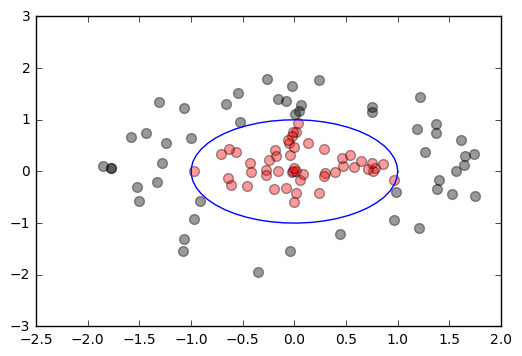

In [13]:
fig = plt.figure(0)
degree = np.random.rand(50) * np.pi * 2
x_1 = np.cos(degree) * np.random.rand(50)
y_1 = np.sin(degree) * np.random.rand(50)
x_2 = np.cos(degree) * (1 + np.random.rand(50))
y_2 = np.sin(degree) * (1 + np.random.rand(50))

t = np.linspace(0, np.pi * 2, 50)
x_3 = np.cos(t)
y_3 = np.sin(t)

scatter(x_1, y_1, c = 'red', s = 50, alpha = 0.4, marker = 'o')
scatter(x_2, y_2, c = 'black', s = 50, alpha = 0.4, marker = 'o')
plot(x_3, y_3)

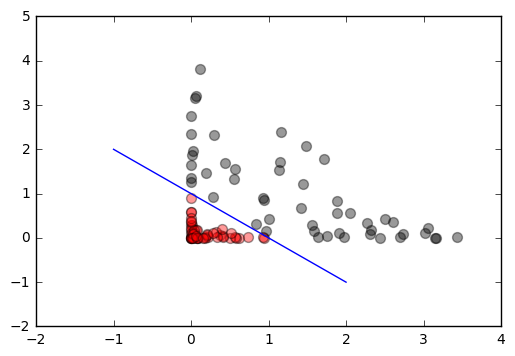

In [14]:
fig2 = plt.figure(1)
x_4 = x_1**2
y_4 = y_1**2
x_5 = x_2**2
y_5 = y_2**2

x_6 = np.linspace(-1, 2, 50)
y_6 = 1 - x_6

scatter(x_4, y_4, c = 'red', s = 50, alpha = 0.4, marker = 'o')
scatter(x_5, y_5, c = 'black', s = 50, alpha = 0.4, marker = 'o')
plot(x_6, y_6)